#### Problem Statement: The increasing volume of online transactions in North Africa presents a significant challenge in identifying and preventing fraudulent activities. There is a need for a more effective and proactive approach to identify fraudulent transactions.

## 1. Import libraries and load dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('fraud_dataset_northafrica_5000.csv')
df

,user_id,transaction_frequency_24h,transaction_frequency_7d,avg_tx_amount_user,deviation_from_avg_tx,login_location_velocity,account_device_count,account_ip_count,new_device_flag,multiple_cards_on_account,...,session_length,checkout_speed,time_of_day_risk,prior_chargeback_flag,prior_fraud_ip_flag,payment_method,shipping_country,billing_country,item_category,fraud_label
0,U57270,1,1,312.27,-0.89,0,4,3,0,0,...,732.4,385.0,0,0,0,debit_card,Tunisia,Tunisia,groceries,0
1,U57603,1,2,280.54,-0.46,0,3,3,0,1,...,1160.8,119.1,0,0,0,bank_transfer,Libya,Libya,electronics,0
2,U50860,2,7,324.36,-0.11,1,3,2,0,0,...,981.0,328.4,1,0,0,bank_transfer,Egypt,Egypt,fashion,0
3,U55390,2,5,121.39,0.45,0,3,3,0,0,...,177.1,361.6,0,0,0,credit_card,Tunisia,Tunisia,fashion,0
4,U55226,0,5,342.74,-0.95,0,1,4,0,0,...,692.8,570.3,0,0,0,credit_card,Egypt,Egypt,electronics,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,U55647,3,6,264.34,-0.39,0,3,3,0,0,...,228.5,293.0,0,0,0,google_pay,Morocco,Morocco,sports,0
4996,U55185,1,3,170.54,2.17,0,3,3,0,1,...,408.3,428.6,0,0,0,credit_card,Libya,Libya,electronics,1
4997,U57079,0,1,250.57,-0.63,0,2,1,0,0,...,185.3,182.0,0,0,0,debit_card,Tunisia,Tunisia,fashion,0
4998,U55776,6,10,229.64,-0.34,0,2,4,0,0,...,1428.9,513.4,0,0,1,credit_card,Libya,Libya,electronics,0


In [33]:
df.columns

Index(['user_id', 'transaction_frequency_24h', 'transaction_frequency_7d',
       'avg_tx_amount_user', 'deviation_from_avg_tx',
       'login_location_velocity', 'account_device_count', 'account_ip_count',
       'new_device_flag', 'multiple_cards_on_account', 'name_mismatch_score',
       'card_attempts_last_24h', 'multiple_cards_same_ip', 'session_length',
       'checkout_speed', 'time_of_day_risk', 'prior_chargeback_flag',
       'prior_fraud_ip_flag', 'payment_method', 'shipping_country',
       'billing_country', 'item_category', 'fraud_label'],
      dtype='object')

### Understanding the features (Data Dictionary):

1. user_id:	Unique user identifier (simulated).
2. transaction_frequency_24h:	Number of transactions made by the user in the last 24 hours. Higher frequency may indicate bot/fraud activity.
3. transaction_frequency_7d:	Number of transactions in the last 7 days. Useful for spotting abnormal weekly spikes.
4. avg_tx_amount_user:	User’s historical average transaction amount.
5. deviation_from_avg_tx:	Ratio showing how much the current transaction deviates from the user’s average (positive = unusually high, negative = unusually low).
6. login_location_velocity:	Binary flag (0/1). Set to 1 if the user logged in from two distant locations in a short time (impossible travel).
7. account_device_count:	Number of unique devices linked to the account. More devices may indicate account sharing or compromise.
8. account_ip_count:	Number of unique IPs linked to the account. Multiple IPs can suggest fraudulent behavior.
9. new_device_flag:	Binary flag (0/1). Indicates if the transaction is from a device not seen before for this account.
10. multiple_cards_on_account:	Number of different payment cards linked to the same account.
11. name_mismatch_score:	Score (0–1) showing mismatch between account name and cardholder name (higher = higher mismatch risk).
12. card_attempts_last_24h:	Number of failed or repeated card attempts in the last 24 hours.
13. multiple_cards_same_ip:	Number of different cards used from the same IP address.
14. session_length:	Duration of the user’s session in seconds.
15. checkout_speed:	Time (seconds) from adding an item to checkout. Unusually fast speed can be a fraud signal.
16. time_of_day_risk:	Binary flag (0/1). Set to 1 if the transaction happens at odd/risky hours (e.g., 2–5 AM).
17. prior_chargeback_flag:	Binary flag (0/1). Indicates if the account has had a chargeback in the past.
18. prior_fraud_ip_flag:	Binary flag (0/1). Indicates if the IP address was previously associated with fraud.
19. payment_method:	Method of payment (credit card, debit card, PayPal, Apple Pay, Google Pay, bank transfer).
20. shipping_country:	Destination shipping country (within North Africa).
21. billing_country:	Billing country of the cardholder (mismatch with shipping may increase risk).
22. item_category:	Product category (electronics, fashion, luxury, gift cards, etc.). Certain categories (luxury, gift cards) have higher fraud risk.
23. fraud_label:	Target variable: 1 = Fraudulent transaction, 0 = Legitimate.

## 2. EDA

In [34]:
df.describe()

,transaction_frequency_24h,transaction_frequency_7d,avg_tx_amount_user,deviation_from_avg_tx,login_location_velocity,account_device_count,account_ip_count,new_device_flag,multiple_cards_on_account,name_mismatch_score,card_attempts_last_24h,multiple_cards_same_ip,session_length,checkout_speed,time_of_day_risk,prior_chargeback_flag,prior_fraud_ip_flag,fraud_label
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.212000,3.232600,209.696766,-0.051282,0.112200,2.537200,3.013000,0.200800,0.297800,0.283614,0.201000,0.101000,914.675240,298.55710,0.149600,0.053200,0.027400,0.054400
std,1.114677,1.816358,109.143525,1.717259,0.315644,1.238274,1.441543,0.400639,0.550251,0.161346,0.451929,0.320655,514.291994,171.88108,0.356715,0.224455,0.163262,0.226828
min,0.000000,0.000000,20.040000,-1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,31.800000,5.10000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,116.985000,-0.830000,0.000000,2.000000,2.000000,0.000000,0.000000,0.160000,0.000000,0.000000,464.625000,150.70000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,210.700000,-0.570000,0.000000,2.000000,3.000000,0.000000,0.000000,0.260000,0.000000,0.000000,919.550000,294.40000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,304.255000,0.020000,0.000000,3.000000,4.000000,0.000000,1.000000,0.382500,0.000000,0.000000,1365.550000,447.00000,0.000000,0.000000,0.000000,0.000000
max,7.000000,11.000000,399.940000,33.090000,1.000000,9.000000,10.000000,1.000000,4.000000,0.930000,3.000000,3.000000,1799.600000,600.00000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    5000 non-null   object 
 1   transaction_frequency_24h  5000 non-null   int64  
 2   transaction_frequency_7d   5000 non-null   int64  
 3   avg_tx_amount_user         5000 non-null   float64
 4   deviation_from_avg_tx      5000 non-null   float64
 5   login_location_velocity    5000 non-null   int64  
 6   account_device_count       5000 non-null   int64  
 7   account_ip_count           5000 non-null   int64  
 8   new_device_flag            5000 non-null   int64  
 9   multiple_cards_on_account  5000 non-null   int64  
 10  name_mismatch_score        5000 non-null   float64
 11  card_attempts_last_24h     5000 non-null   int64  
 12  multiple_cards_same_ip     5000 non-null   int64  
 13  session_length             5000 non-null   float

In [36]:
df.isnull().sum()

,0
user_id,0
transaction_frequency_24h,0
transaction_frequency_7d,0
avg_tx_amount_user,0
deviation_from_avg_tx,0
login_location_velocity,0
account_device_count,0
account_ip_count,0
new_device_flag,0
multiple_cards_on_account,0


In [37]:
# There are no missing records in the dataset

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
# There are no duplicate records in the dataset

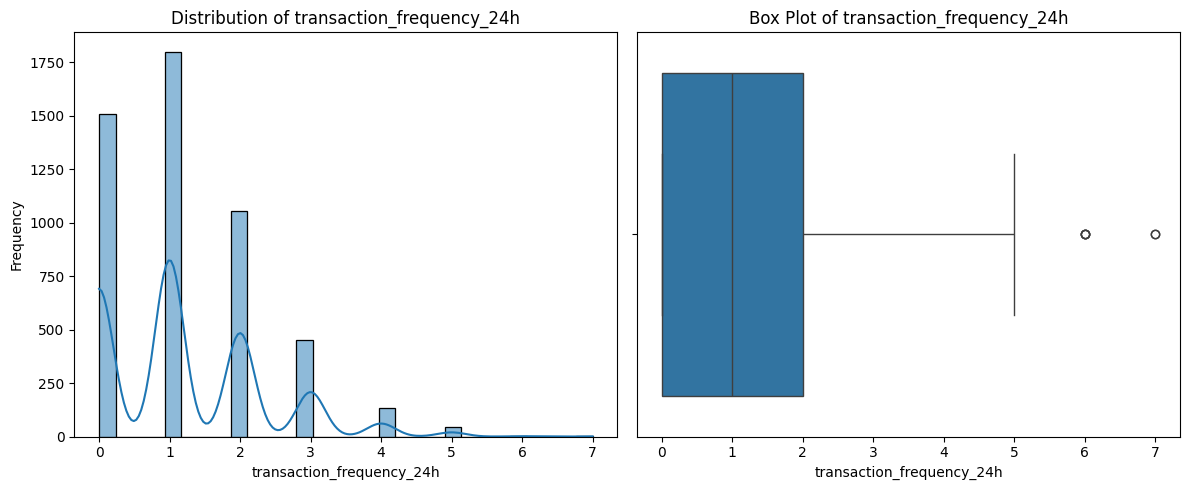

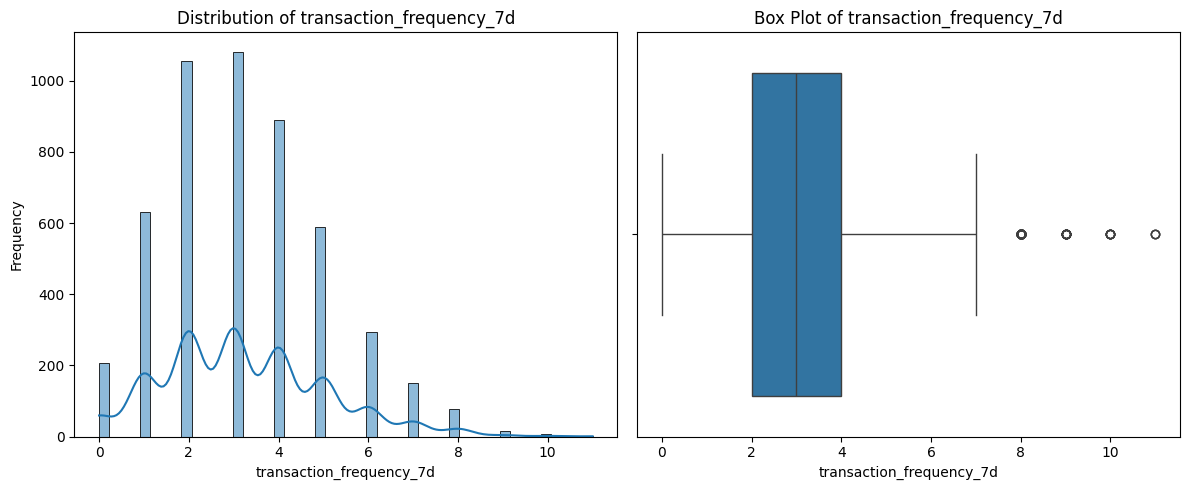

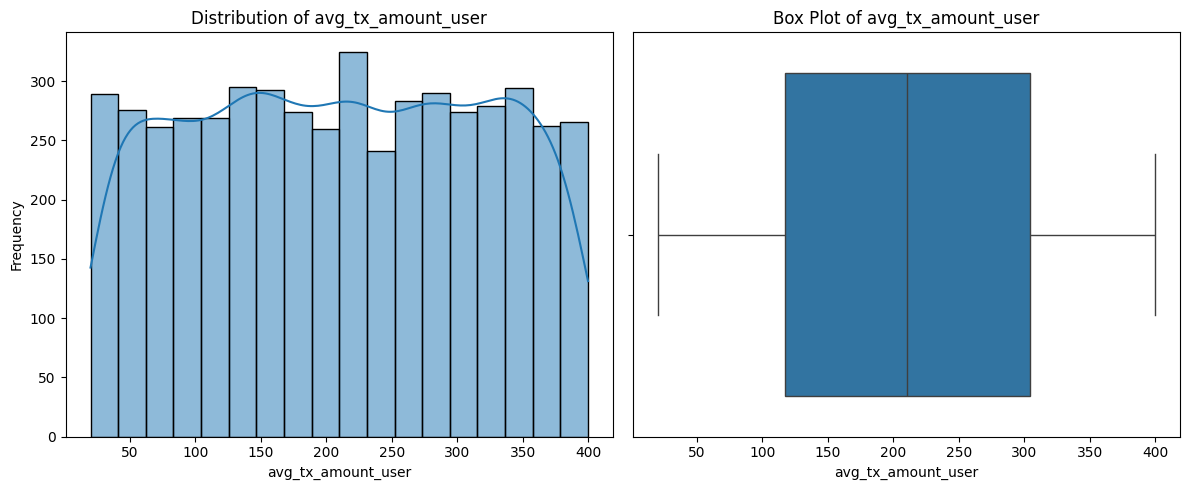

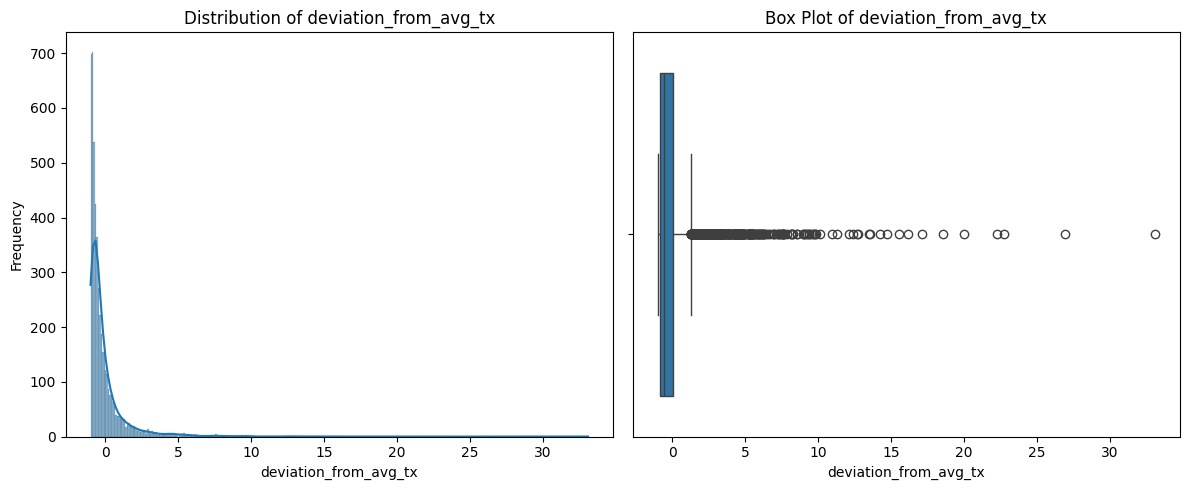

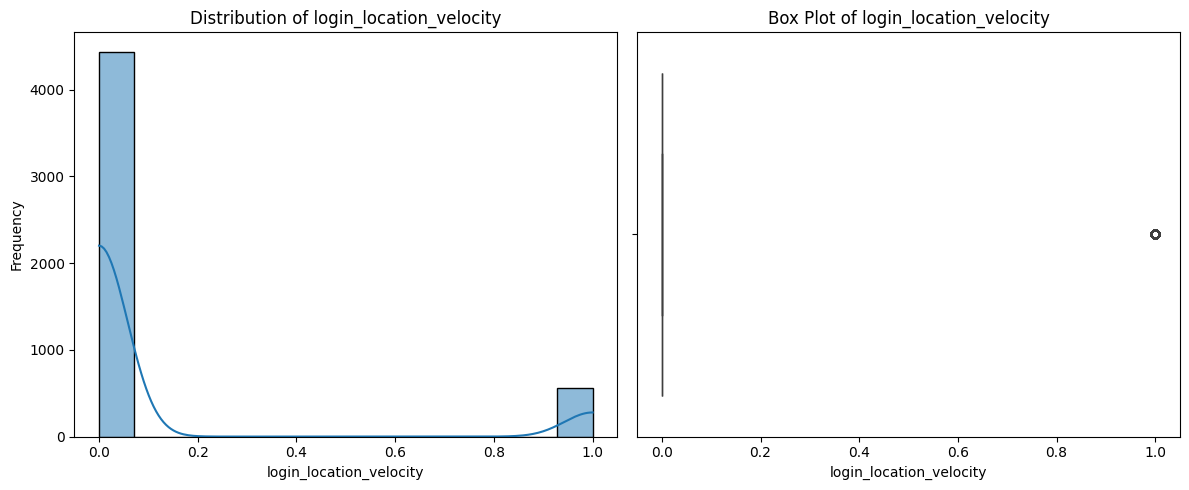

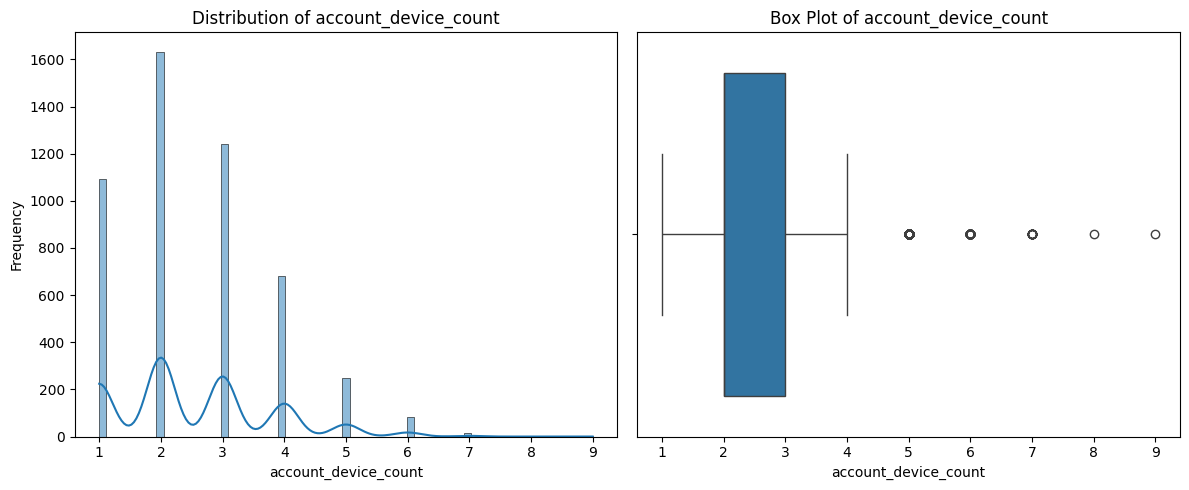

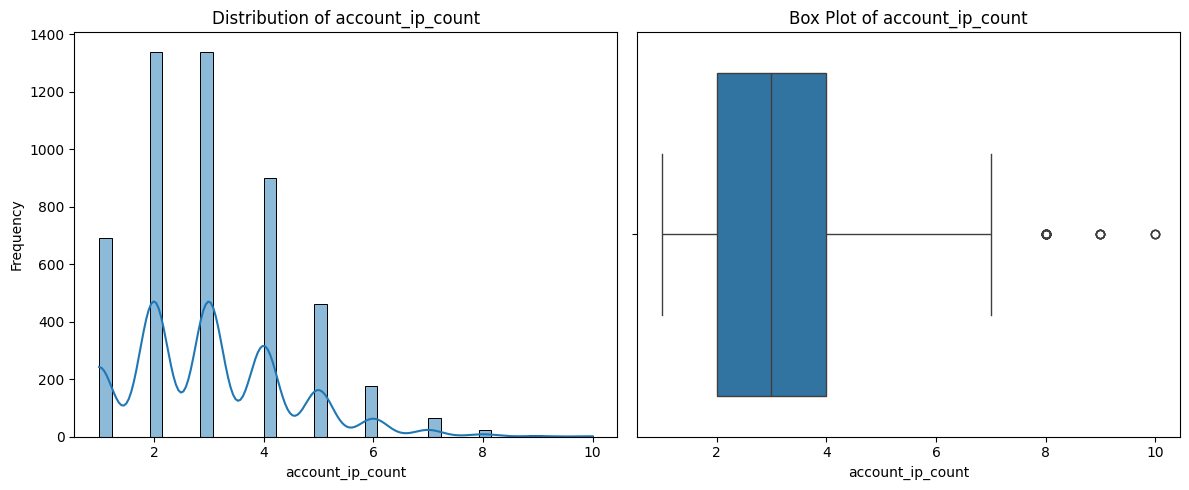

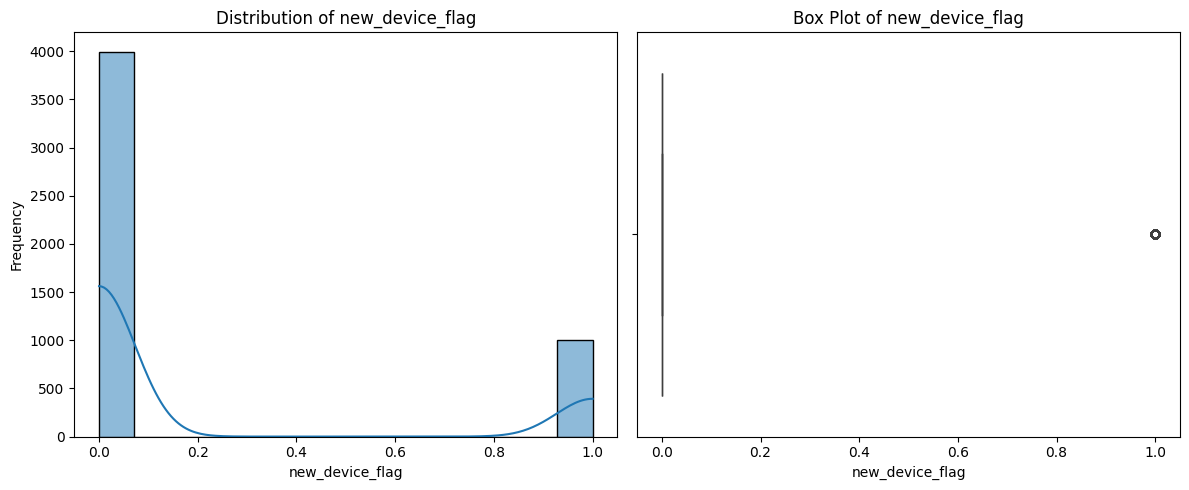

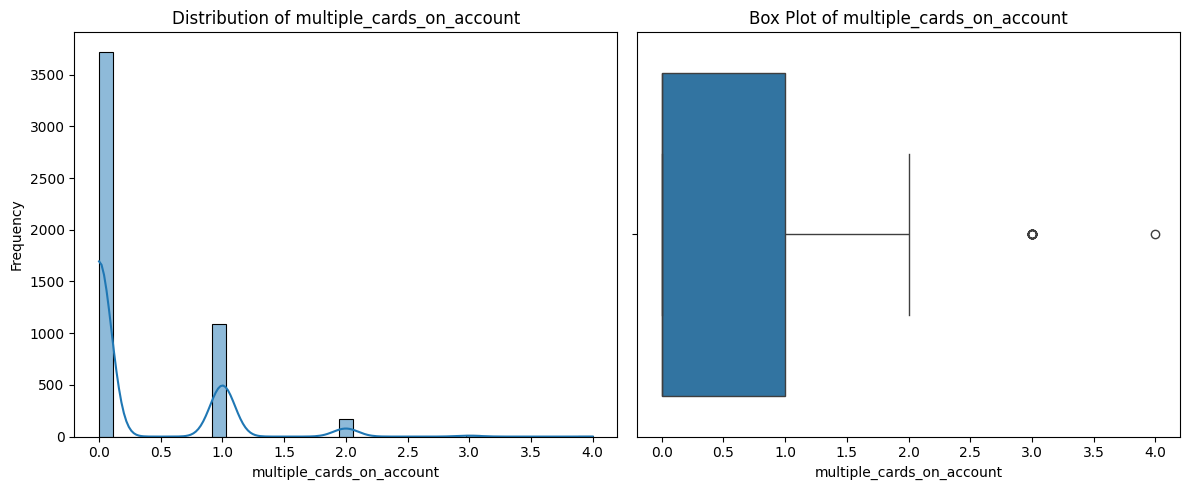

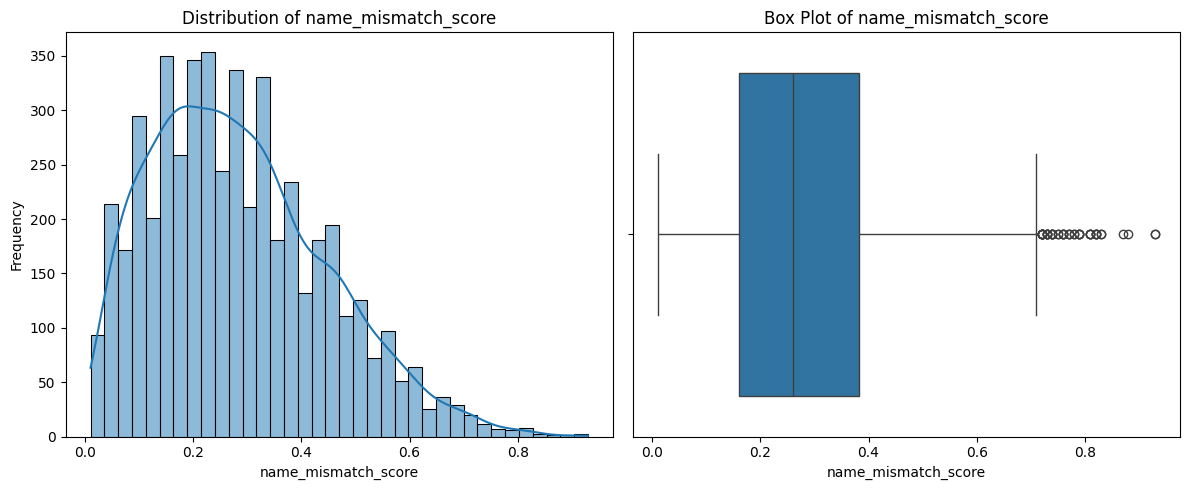

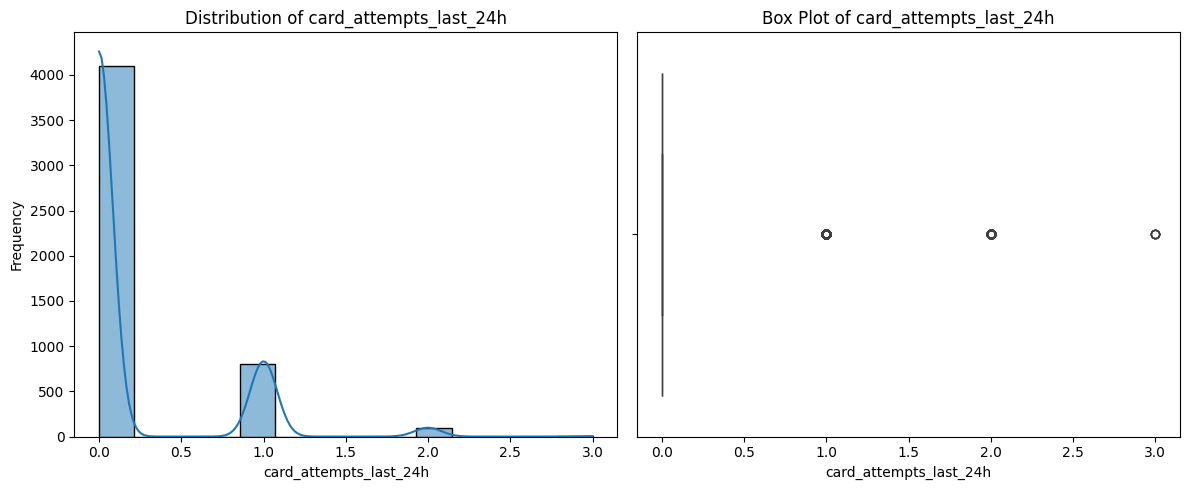

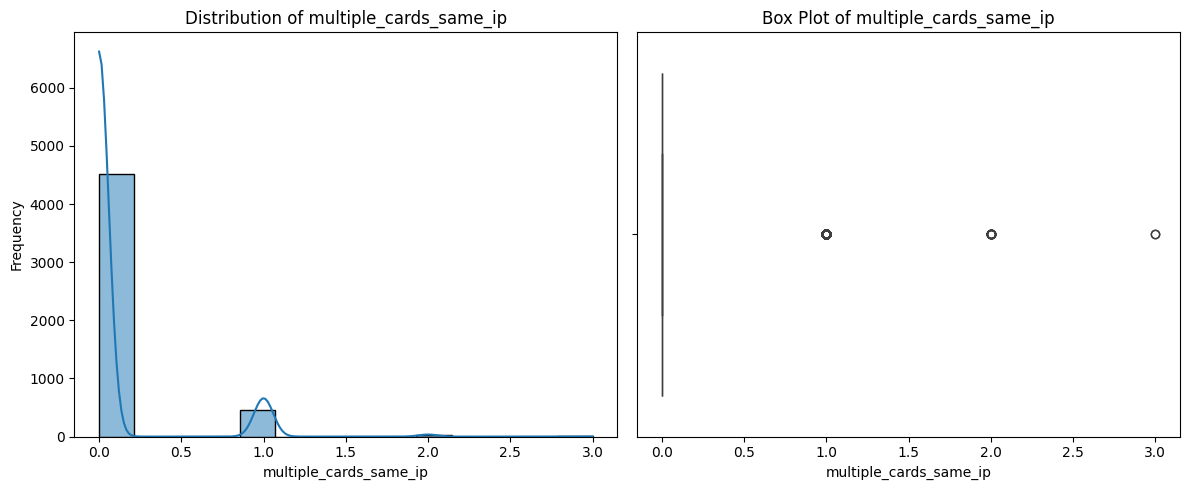

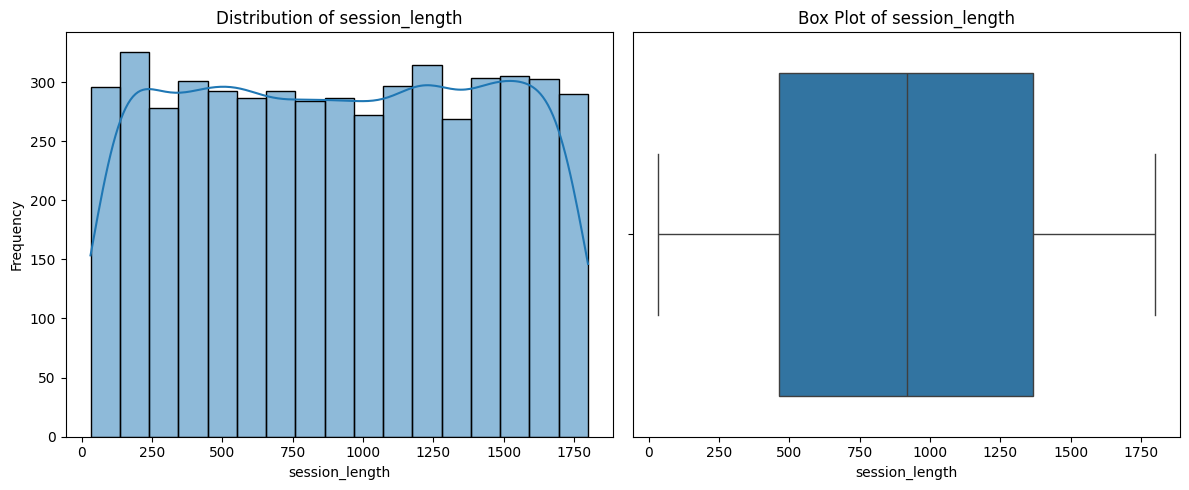

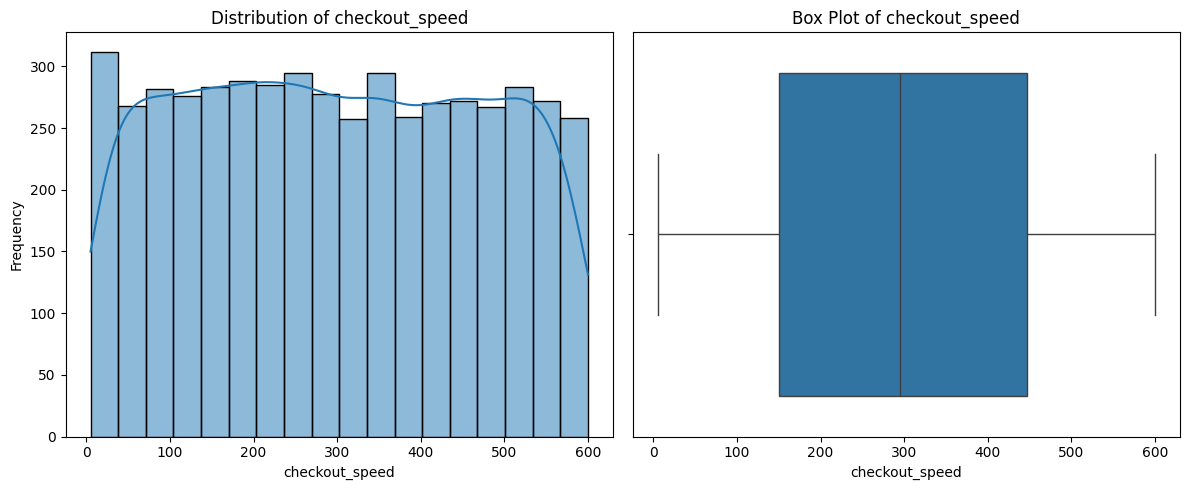

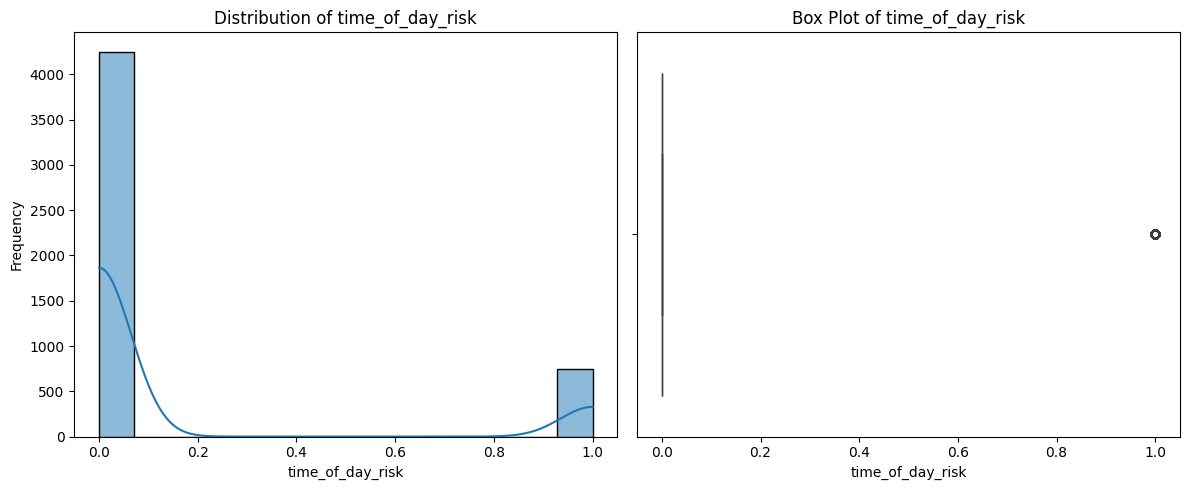

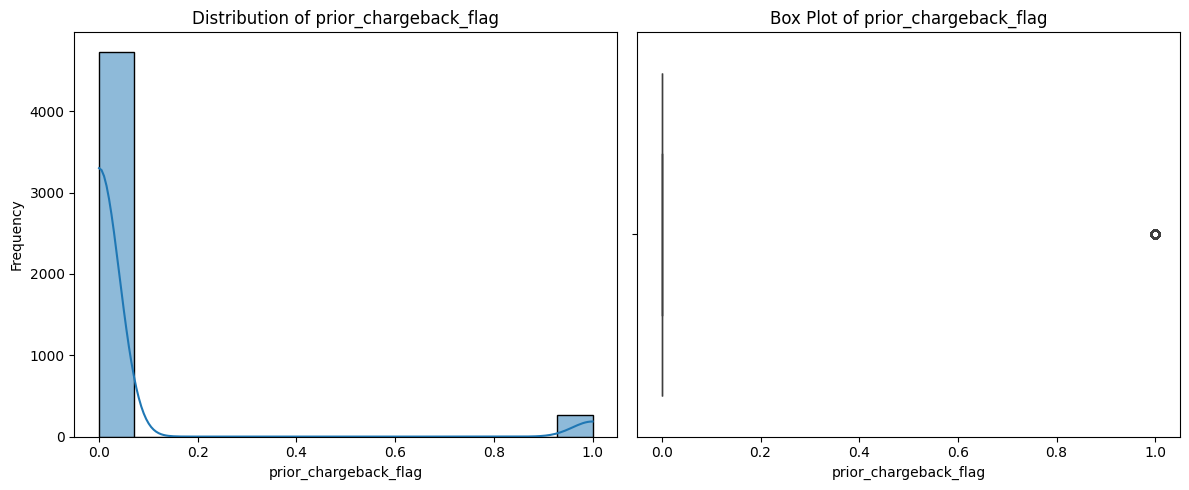

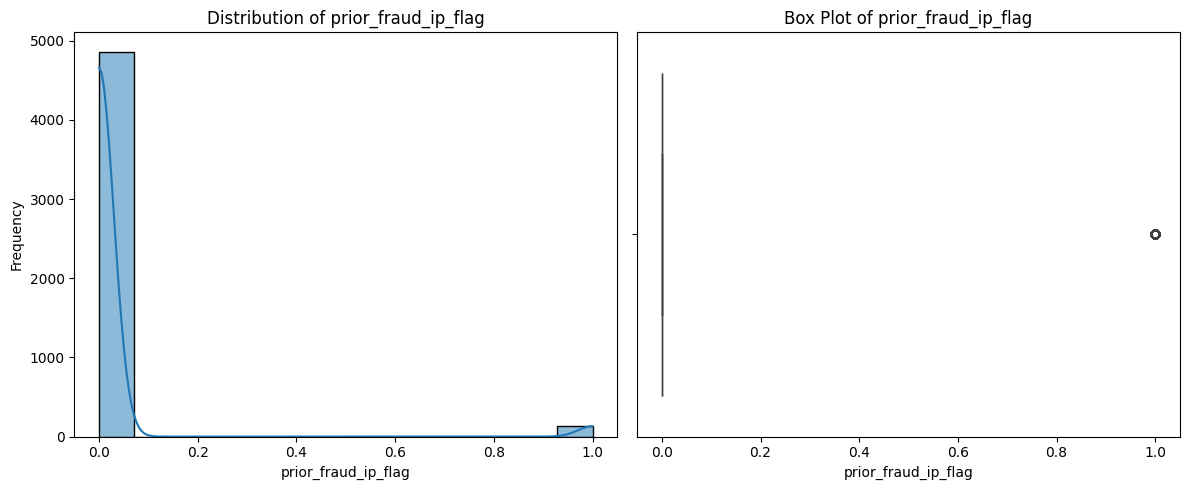

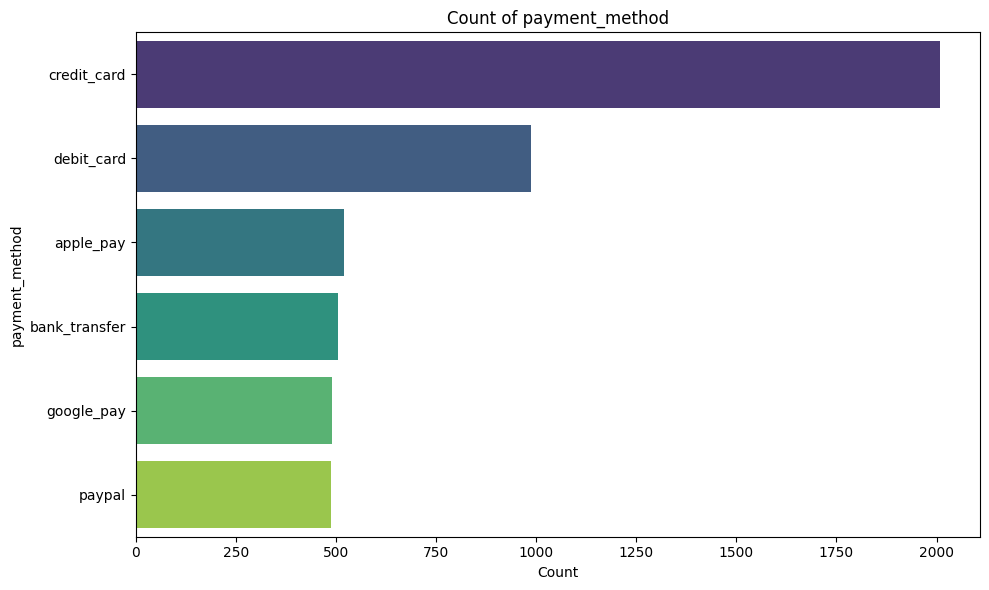

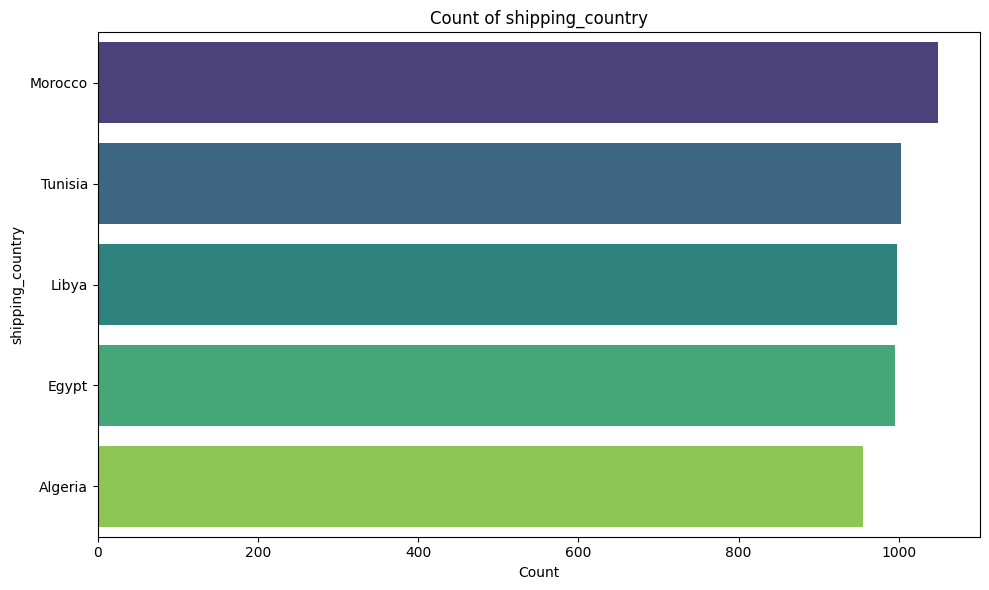

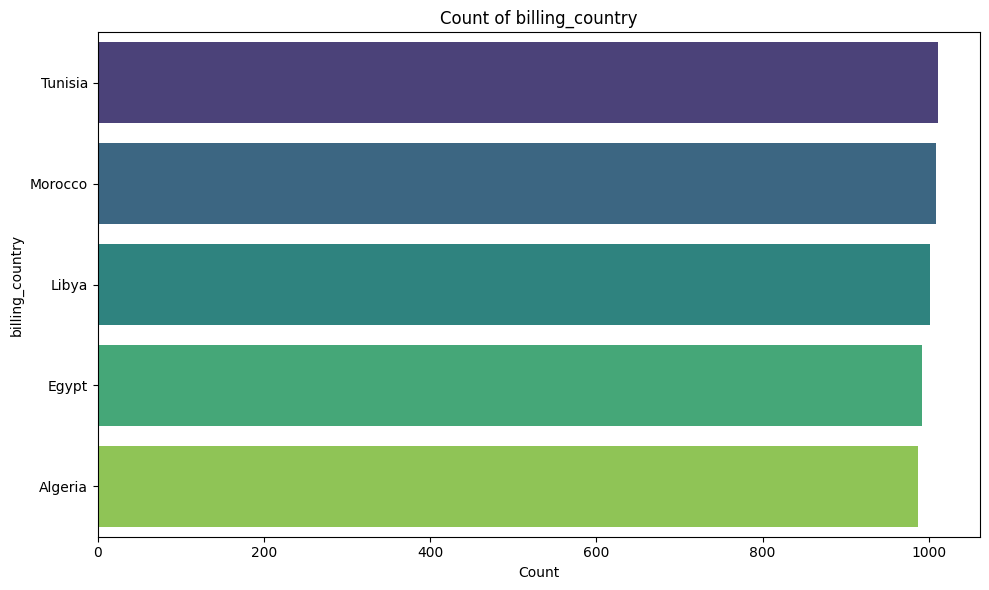

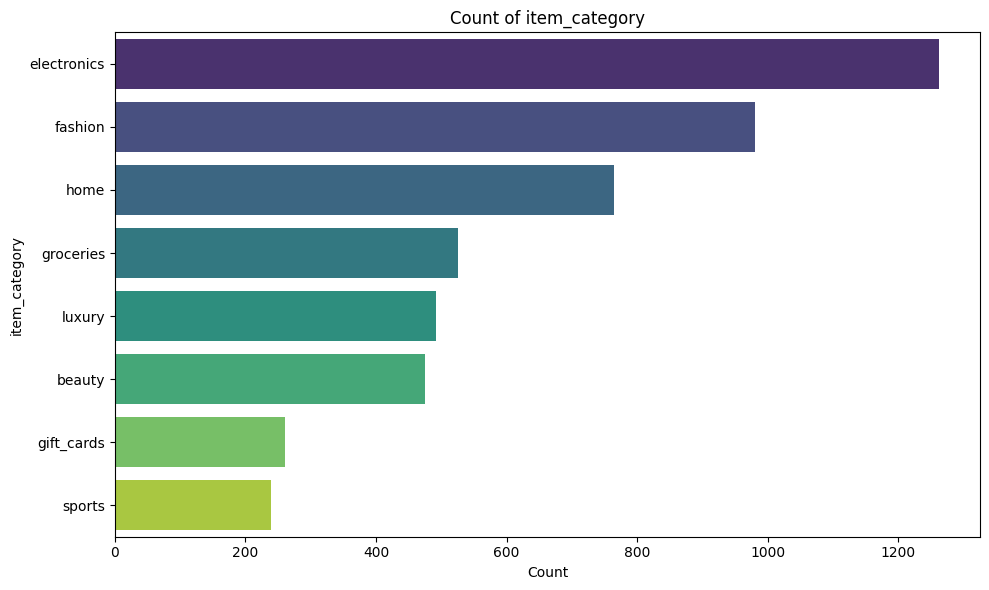

In [40]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Remove 'fraud_label' from numerical columns as it is the target variable and will be analyzed separately
if 'fraud_label' in numerical_cols:
    numerical_cols.remove('fraud_label')

# Remove 'user_id' from categorical columns as it is an identifier
if 'user_id' in categorical_cols:
    categorical_cols.remove('user_id')

# Plotting numerical features
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# Plotting categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

### INSIGHTS:
1. Transaction Frequencies: The histograms and box plots for transaction_frequency_24h and transaction_frequency_7d show that most users have a low number of transactions within these timeframes. There are some outliers with higher frequencies, which could be worth investigating as potential indicators of automated or fraudulent activity.
2. Average Transaction Amount and Deviation: The avg_tx_amount_user distribution appears relatively uniform, while deviation_from_avg_tx is heavily skewed towards zero, indicating that most transactions are close to a user's average. The outliers in deviation_from_avg_tx (high positive values) could be interesting to examine for fraudulent transactions, as they represent unusually large transactions for a given user.
3. Login Location Velocity, New Device Flag, Time of Day Risk, Prior Chargeback Flag, Prior Fraud IP Flag: These are binary flags, and the count plots show that the vast majority of transactions do not exhibit these risky behaviors. However, the presence of a small number of transactions with these flags set to 1 suggests they could be important features for identifying fraud.
4. Account Device Count and Account IP Count: The distributions show that most accounts are associated with a small number of devices and IP addresses. Outliers with higher counts might indicate shared or compromised accounts.
5. Multiple Cards on Account and Multiple Cards Same IP: Similar to the device and IP counts, most accounts have a low number of cards associated with them, and most IPs are not used with multiple cards. The outliers could be indicative of fraudulent patterns.
6. Name Mismatch Score: The distribution shows a range of mismatch scores, with a peak at lower scores. Higher mismatch scores might be associated with fraud.
7. Card Attempts Last 24h and Multiple Cards Same IP: These features, like the other count-based features, show that most transactions have low counts, with a few outliers. High numbers of card attempts or multiple cards from the same IP are strong potential fraud indicators.
8. Session Length and Checkout Speed: These features appear to have relatively uniform distributions across their ranges. Further analysis, perhaps in relation to the fraud_label, would be needed to determine their significance.
9. Categorical Features (Payment Method, Shipping Country, Billing Country, Item Category): The count plots for these features show the frequency of each category. Analyzing the distribution of the fraud_label within each category could reveal which payment methods, countries, or item categories are associated with higher fraud rates.

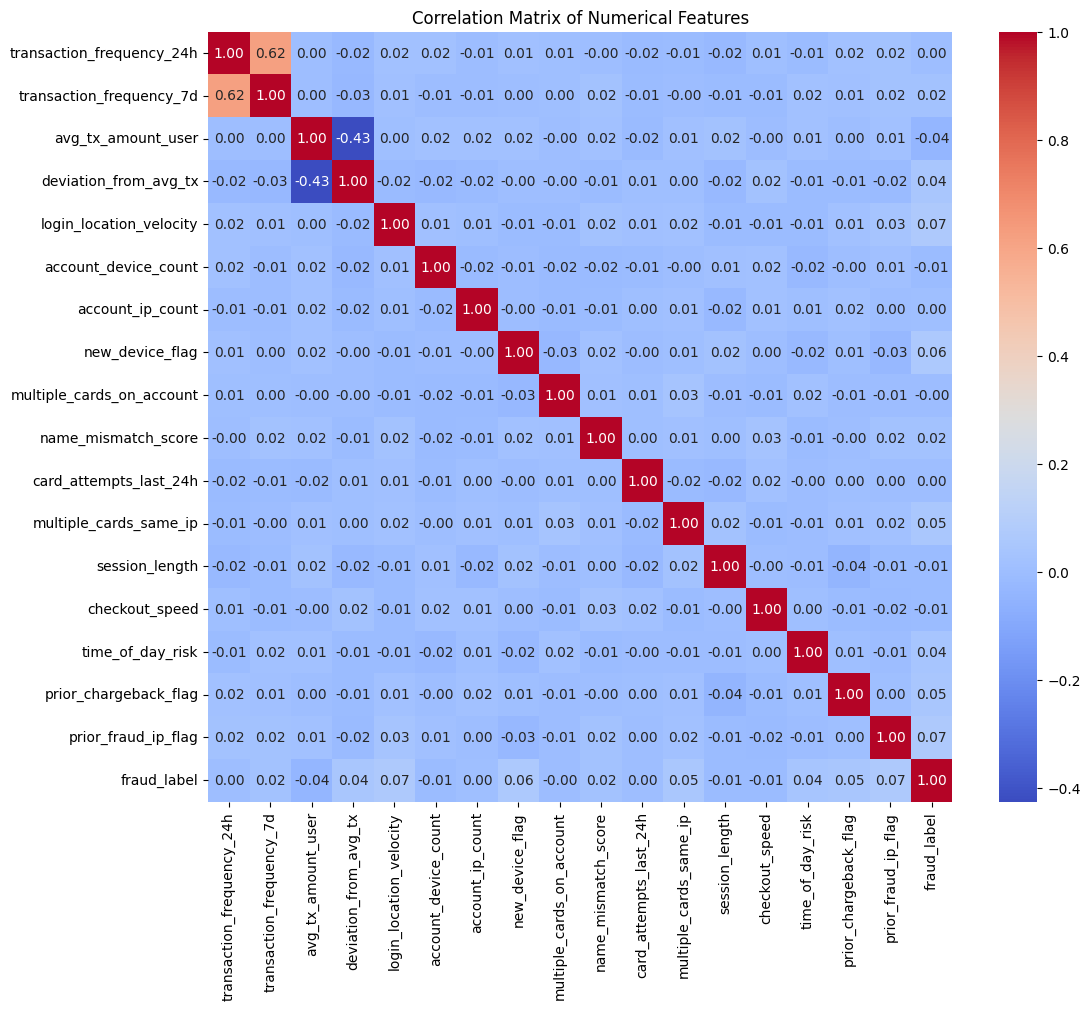

In [41]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [42]:
# We can see there is no impactful correlation of any input feature with the target variable

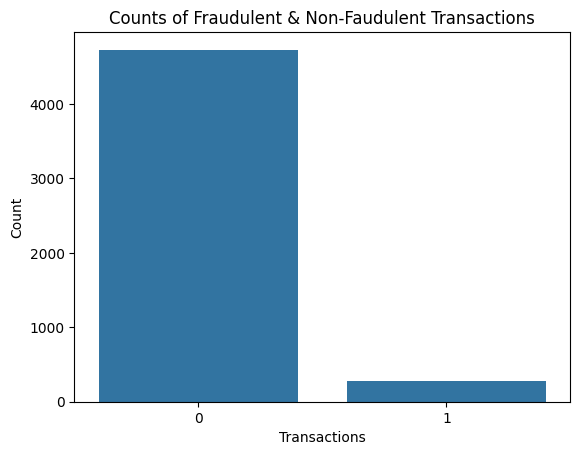

,count
fraud_label,
0,4728
1,272


In [43]:
sns.countplot(x='fraud_label', data = df)
plt.title('Counts of Fraudulent & Non-Faudulent Transactions')
plt.xlabel('Transactions')
plt.ylabel('Count')
plt.show()
df['fraud_label'].value_counts()

In [44]:
# We can see there is a clear class imbalance for the target variable, but it is closer to real-time scenarios, where fraudulent transactions
# are 5% or less out of total transactions.

# Addressing class imbalance is crucial in fraud detection. Since fraudulent transactions are rare compared to legitimate ones,
# a model trained on imbalanced data might become biased towards the majority class (non-fraudulent transactions) and perform poorly
# in identifying the minority class (fraudulent transactions). Identifying the minority class is a top priority for this case.

### EDA Key Findings:

*   Univariate analysis revealed the distributions of individual numerical and categorical features, highlighting potential skewness, outliers, and category imbalances.
*   There are no missing values or duplicate records in the dataset.
*   Correlation analysis of numerical features showed generally low correlation coefficients between numerical features and the fraud_label.

### Overall Insights:

*   Based on the low correlations and the lack of clear patterns in the analysis, exploring more complex relationships or non-linear transformations of existing features might be beneficial in future iterations.
*   Proceeding with model building using the existing features, and evaluate model performance to determine if feature engineering is required to improve results.


## 3. Feature Engineering

In [45]:
df.columns

Index(['user_id', 'transaction_frequency_24h', 'transaction_frequency_7d',
       'avg_tx_amount_user', 'deviation_from_avg_tx',
       'login_location_velocity', 'account_device_count', 'account_ip_count',
       'new_device_flag', 'multiple_cards_on_account', 'name_mismatch_score',
       'card_attempts_last_24h', 'multiple_cards_same_ip', 'session_length',
       'checkout_speed', 'time_of_day_risk', 'prior_chargeback_flag',
       'prior_fraud_ip_flag', 'payment_method', 'shipping_country',
       'billing_country', 'item_category', 'fraud_label'],
      dtype='object')

In [46]:
# Remove redundant and less significant features from further analysis and model building

In [47]:
df.drop(['user_id'], inplace=True, axis=1)
df

,transaction_frequency_24h,transaction_frequency_7d,avg_tx_amount_user,deviation_from_avg_tx,login_location_velocity,account_device_count,account_ip_count,new_device_flag,multiple_cards_on_account,name_mismatch_score,...,session_length,checkout_speed,time_of_day_risk,prior_chargeback_flag,prior_fraud_ip_flag,payment_method,shipping_country,billing_country,item_category,fraud_label
0,1,1,312.27,-0.89,0,4,3,0,0,0.34,...,732.4,385.0,0,0,0,debit_card,Tunisia,Tunisia,groceries,0
1,1,2,280.54,-0.46,0,3,3,0,1,0.46,...,1160.8,119.1,0,0,0,bank_transfer,Libya,Libya,electronics,0
2,2,7,324.36,-0.11,1,3,2,0,0,0.30,...,981.0,328.4,1,0,0,bank_transfer,Egypt,Egypt,fashion,0
3,2,5,121.39,0.45,0,3,3,0,0,0.47,...,177.1,361.6,0,0,0,credit_card,Tunisia,Tunisia,fashion,0
4,0,5,342.74,-0.95,0,1,4,0,0,0.03,...,692.8,570.3,0,0,0,credit_card,Egypt,Egypt,electronics,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,6,264.34,-0.39,0,3,3,0,0,0.50,...,228.5,293.0,0,0,0,google_pay,Morocco,Morocco,sports,0
4996,1,3,170.54,2.17,0,3,3,0,1,0.70,...,408.3,428.6,0,0,0,credit_card,Libya,Libya,electronics,1
4997,0,1,250.57,-0.63,0,2,1,0,0,0.08,...,185.3,182.0,0,0,0,debit_card,Tunisia,Tunisia,fashion,0
4998,6,10,229.64,-0.34,0,2,4,0,0,0.53,...,1428.9,513.4,0,0,1,credit_card,Libya,Libya,electronics,0


In [48]:
# Convert categorical column values to vectors
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Separate features (X) and target (y)
X = df.drop('fraud_label', axis=1)
y = df['fraud_label']

# Apply one-hot encoding to categorical features before applying SMOTE
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## 4. Model Building

#### A. Random Forest Classifier

In [49]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

smote = SMOTE(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = ImbPipeline(steps=[
    ('smote', smote),
    ('rf', rf)
])

scoring = {
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring, n_jobs=-1)

In [50]:
from sklearn.model_selection import train_test_split

# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Fit model
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train_res, y_train_res)

# Evaluate on untouched test set
y_pred = rf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

y_proba = rf.predict_proba(X_test)[:, 1]

threshold = 0.1
y_pred = (y_proba >= threshold).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.952     0.375     0.538      1418
           1      0.058     0.671     0.108        82

    accuracy                          0.391      1500
   macro avg      0.505     0.523     0.323      1500
weighted avg      0.903     0.391     0.515      1500



#### B. Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
lr = LogisticRegression(solver='liblinear', random_state=42, class_weight="balanced")

# Fit the Logistic Regression model to the SMOTE-resampled training data
lr.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [53]:
# Predict probabilities on the test set
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.1
y_pred_lr = (y_proba_lr >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_lr, digits=3))

              precision    recall  f1-score   support

           0      0.940     0.477     0.633      1418
           1      0.050     0.476     0.090        82

    accuracy                          0.477      1500
   macro avg      0.495     0.476     0.362      1500
weighted avg      0.892     0.477     0.603      1500



#### C. LightGBM

In [54]:
from lightgbm import LGBMClassifier

# Instantiate LightGBM model
lgbm = LGBMClassifier(random_state=42, class_weight="balanced")

# Fit the LightGBM model to the SMOTE-resampled training data
lgbm.fit(X_train_res, y_train_res)

[LightGBM] [Info] Number of positive: 3310, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 6620, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [55]:
# Predict probabilities on the test set
y_proba_lgbm = lgbm.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.1
y_pred_lgbm = (y_proba_lgbm >= threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_lgbm, digits=3))

              precision    recall  f1-score   support

           0      0.943     0.799     0.865      1418
           1      0.044     0.159     0.068        82

    accuracy                          0.764      1500
   macro avg      0.493     0.479     0.467      1500
weighted avg      0.893     0.764     0.821      1500



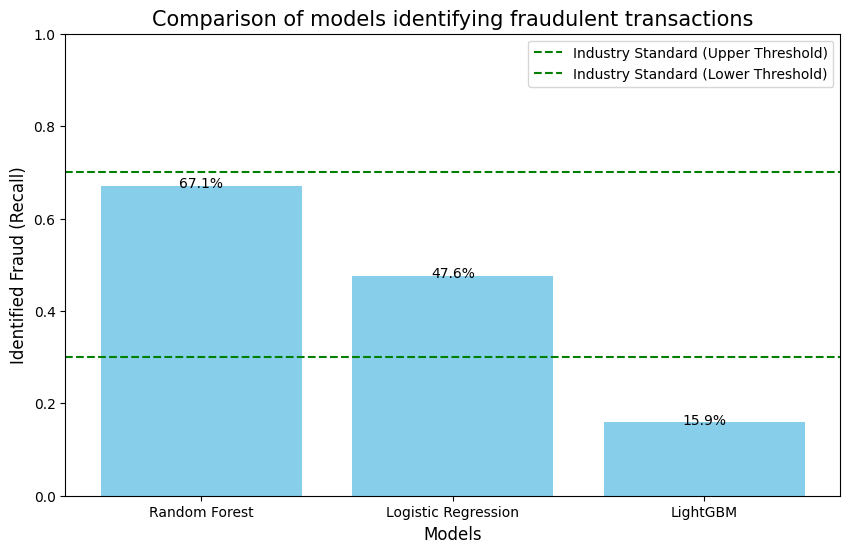

In [57]:
# Update lists to include LightGBM
models = ['Random Forest', 'Logistic Regression', 'LightGBM']
recall_scores = [0.671, 0.476, 0.159]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, recall_scores, color=['skyblue', 'skyblue', 'skyblue'])
plt.ylim(0, 1)
plt.xlabel('Models', size=12)
plt.ylabel('Identified Fraud (Recall)', size=12)
plt.axhline(y=0.7, color='green', linestyle='--', label='Industry Standard (Upper Threshold)')
plt.axhline(y=0.3, color='green', linestyle='--', label='Industry Standard (Lower Threshold)')
plt.legend()
plt.title('Comparison of models identifying fraudulent transactions', size=15)

# Add data labels in percentage
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.1%}', ha='center', va='top')

plt.show()

## CONCLUSION:

#### The goal is to:

* Catch as many frauds as possible (high recall).

* Without overwhelming investigators (precision trade-off).

#### Low metrics are expected in fraud detection, and the goal isn’t perfection but to reduce financial loss while keeping false positives manageable.

#### Industry-grade models often report:

* Precision (for class 1): 5–15% (most flagged cases are false positives)

* Recall (for class 1): 30–70% (catching many, but not all, fraud)

#### By these standards, we can clearly see that 'Random Forest' model achieved the better recall value for fraud class and within industry standards threshold, without compromising much on precision. Yes, some false alarms are expected due to 'recall precision trade-off' but it is better to review false flags than missing out on fraudulent transactions.

#### Thus, the Random Forest model is able to identify 67.1% of fraudulent transactions, saving significant remedial costs to the operating business.

## 5. Model Deployment

In [45]:
import pickle

# Save the model
filename = 'random_forest_model (1).pkl'
pickle.dump(rf, open(filename, 'wb'))

print(f"Model saved as {filename}")

Model saved as random_forest_model (1).pkl


In [46]:
# Get feature importances for displaying in deployed model user interface
importances = rf.feature_importances_

# Get feature names from the training data (after SMOTE and one-hot encoding)
feature_names = X_train_res.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance in descending order
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Select the top 10 features
top_n = 10
important_features = feature_importances_df.head(top_n)['feature'].tolist()

print("Top 10 Important Features:")
print(important_features)

Top 10 Important Features:
['session_length', 'checkout_speed', 'avg_tx_amount_user', 'deviation_from_avg_tx', 'payment_method_credit_card', 'item_category_luxury', 'name_mismatch_score', 'item_category_fashion', 'account_device_count', 'account_ip_count']
